In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
dataframe = pd.read_csv('./data/smoking_train.csv')

In [182]:
dataframe.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


In [183]:
dataframe.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [184]:
dataframe.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,44554.000000,44114.000000,44554.000000,44510.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,...,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000
mean,27873.284666,44.198894,164.651434,65.875534,82.048245,1.012046,1.008529,1.026148,1.026395,121.485770,...,126.723235,57.299210,114.937649,14.624036,1.086996,0.886179,26.191251,27.108385,40.017417,0.213180
std,16068.515110,12.087633,9.209962,12.828470,9.275402,0.481693,0.492130,0.159577,0.160309,13.668845,...,71.619939,14.819603,41.241943,1.562096,0.403306,0.221365,19.243979,32.568240,50.624265,0.409558
min,2.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,11.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,13951.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,27888.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,41770.750000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,...,999.000000,618.000000,1810.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


# Анализ:




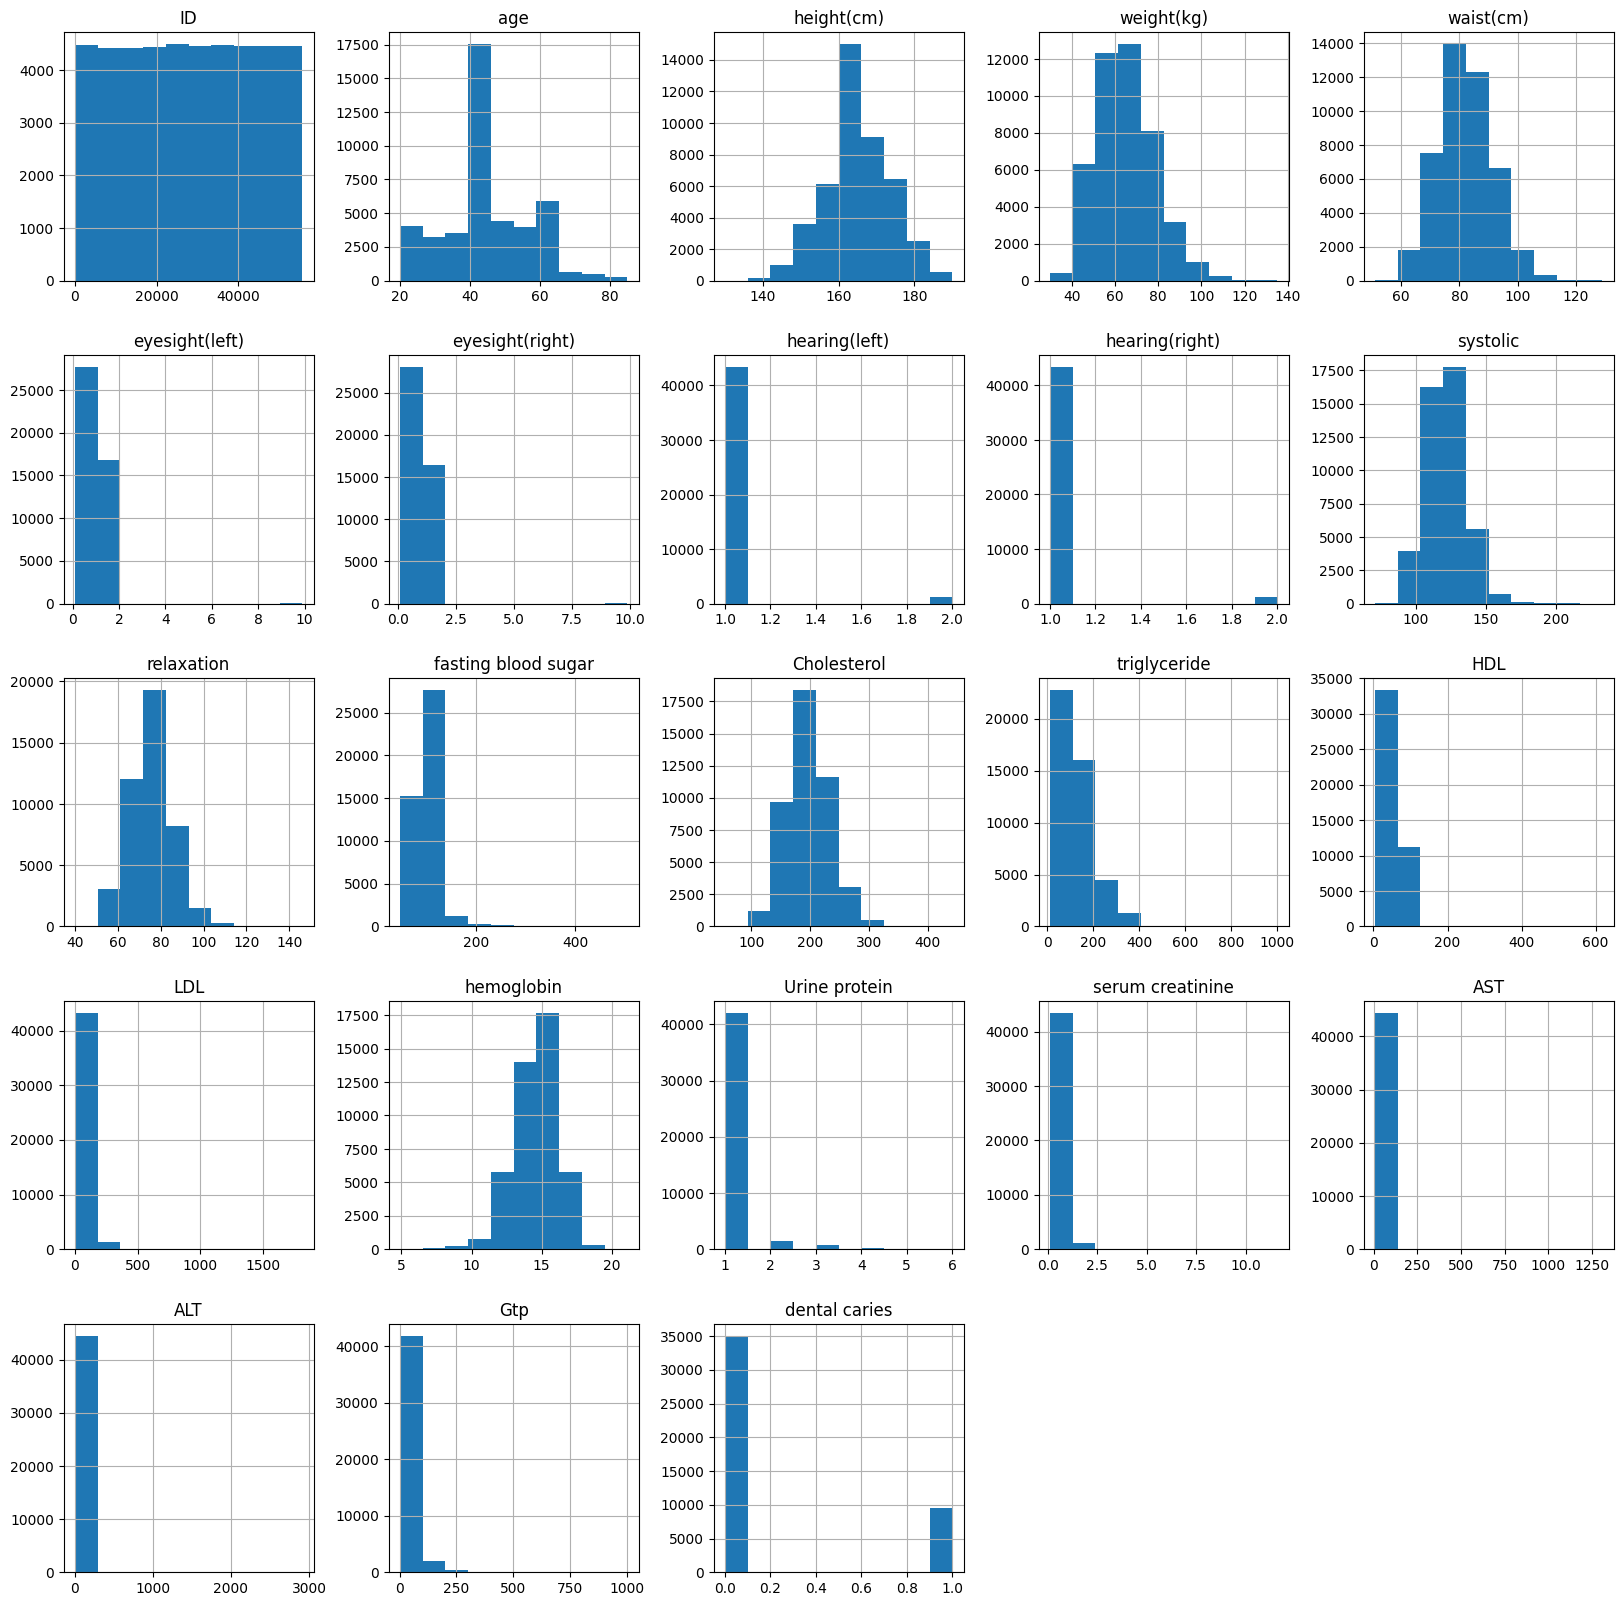

In [185]:
dataframe.hist(figsize=(20, 20))
None

/tmp/ipykernel_4019/2979759287.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i+1)


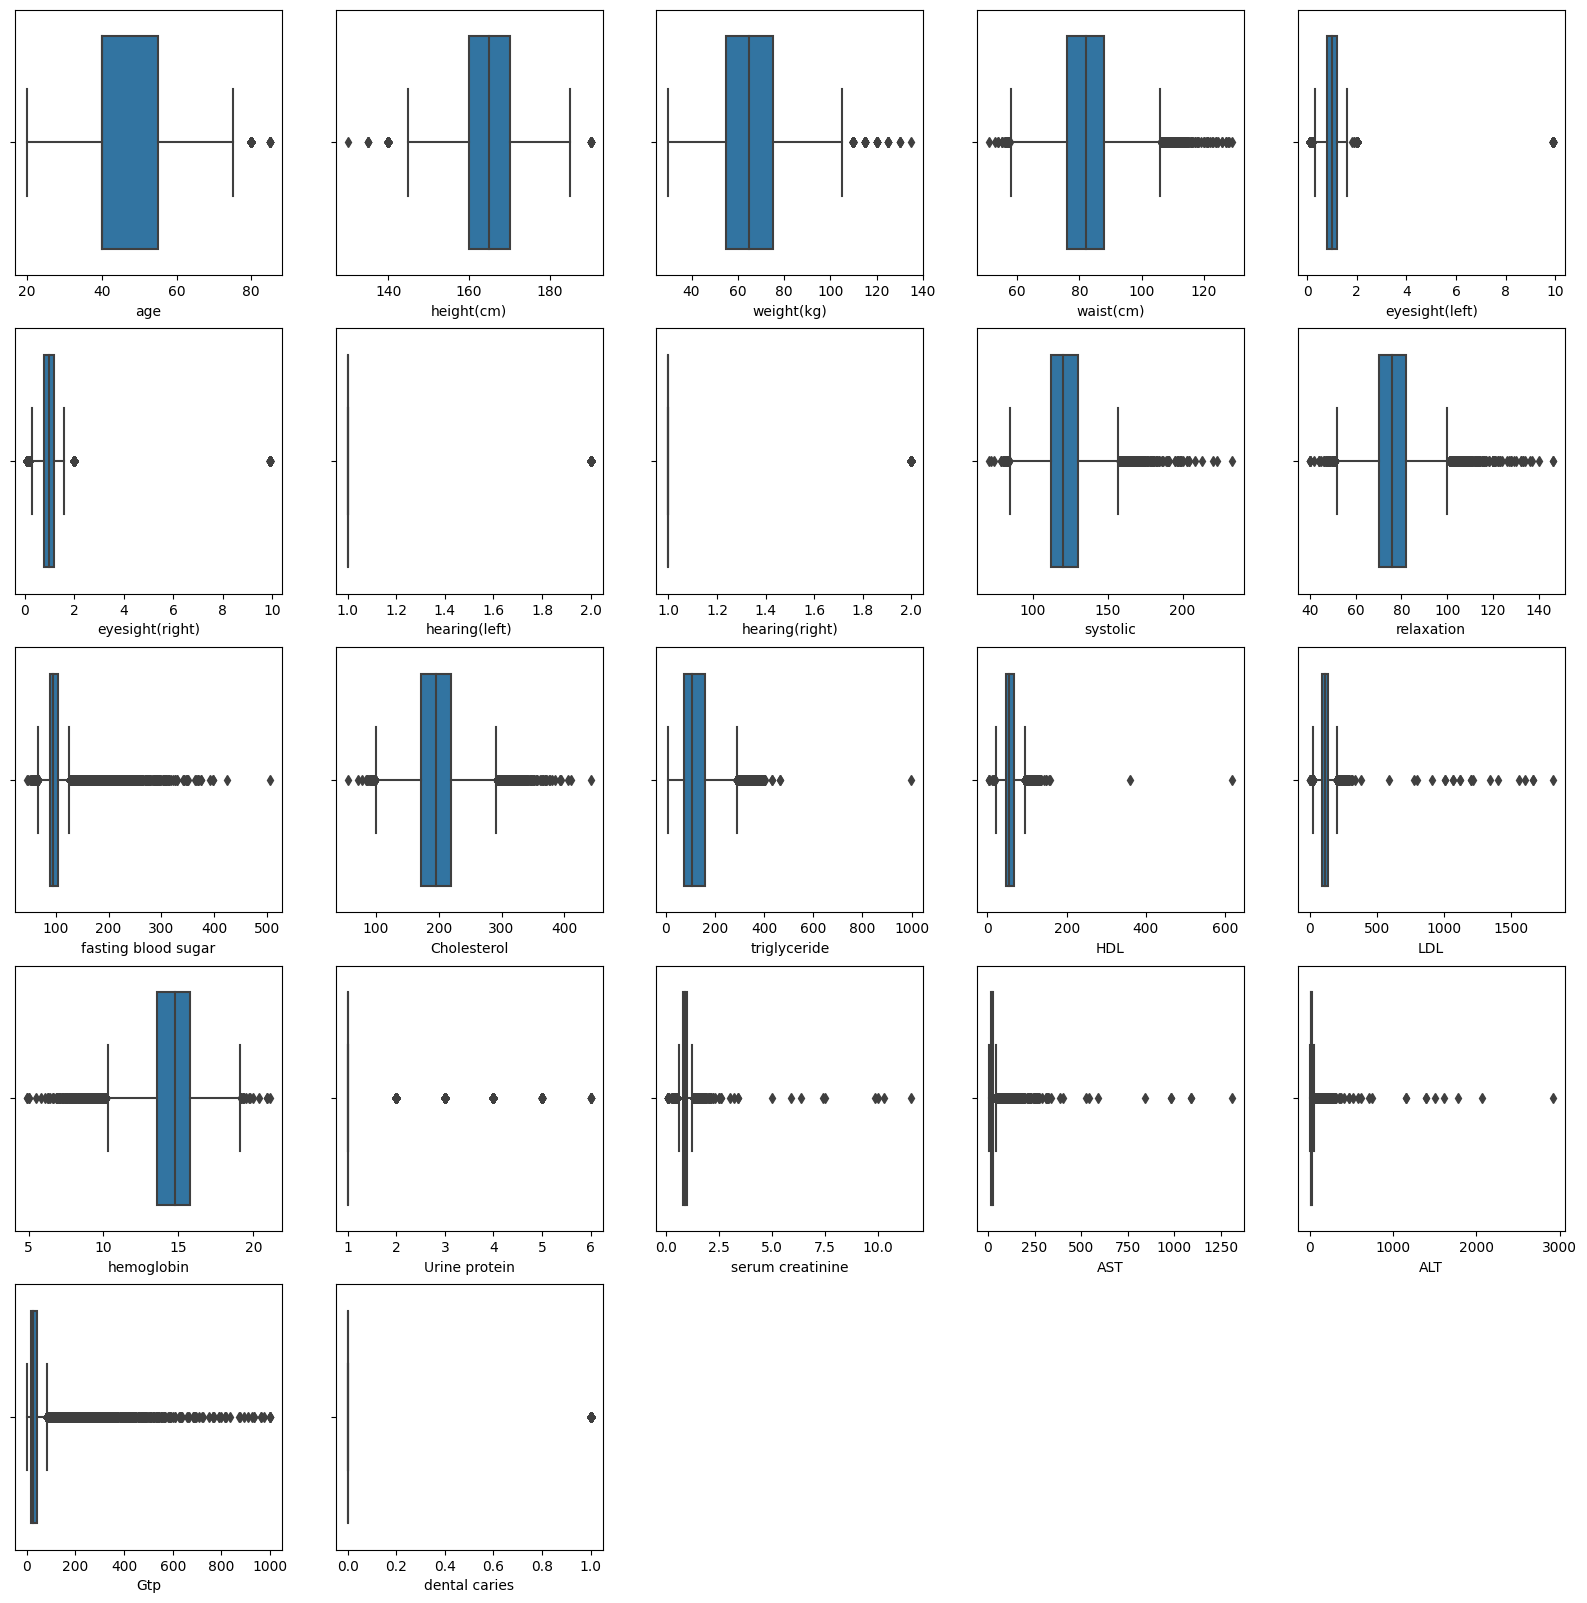

In [186]:
andf = dataframe.select_dtypes(include=np.number).drop(columns=['ID'], axis=1)

fig, ax = plt.subplots(figsize=(20, 20))


for i, col in enumerate(andf.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x=col, data=dataframe)

None

In [187]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  object 
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

In [188]:
dataframe.isna().sum()

ID                       0
gender                   0
age                    440
height(cm)               0
weight(kg)              44
waist(cm)                0
eyesight(left)           0
eyesight(right)          0
hearing(left)            0
hearing(right)           0
systolic                 0
relaxation               0
fasting blood sugar      0
Cholesterol              0
triglyceride             0
HDL                      0
LDL                      0
hemoglobin               0
Urine protein            0
serum creatinine         0
AST                      0
ALT                      0
Gtp                      0
oral                     0
dental caries            0
tartar                   0
smoking                  0
dtype: int64

In [189]:
df_nan = dataframe.loc[:, dataframe.isnull().any()]
df_nan.isnull().sum() / len(df_nan) * 100

age           0.987566
weight(kg)    0.098757
dtype: float64

In [190]:
dataframe['age'].value_counts()

40.0    11994
45.0     5538
60.0     4877
50.0     4420
55.0     3988
35.0     3566
30.0     3252
25.0     2765
20.0     1267
65.0     1056
70.0      644
75.0      504
80.0      230
85.0       13
Name: age, dtype: int64

Выдвенем гипотезу:
H0: Распределение weight(kg) нормальное

In [191]:
from scipy import stats

Применим критерий Колмогорова-Смирнова для проверки гипотезы о нормальности распределения weight(kg) на уровне значимости 0.05

In [192]:
s = stats.kstest(dataframe[dataframe['weight(kg)'].notna()]['weight(kg)'], 'norm')
s

KstestResult(statistic=1.0, pvalue=0.0)

Получаем p-value = 0.0 < 0.05, следовательно, гипотеза о нормальности распределения weight(kg) отвергается.

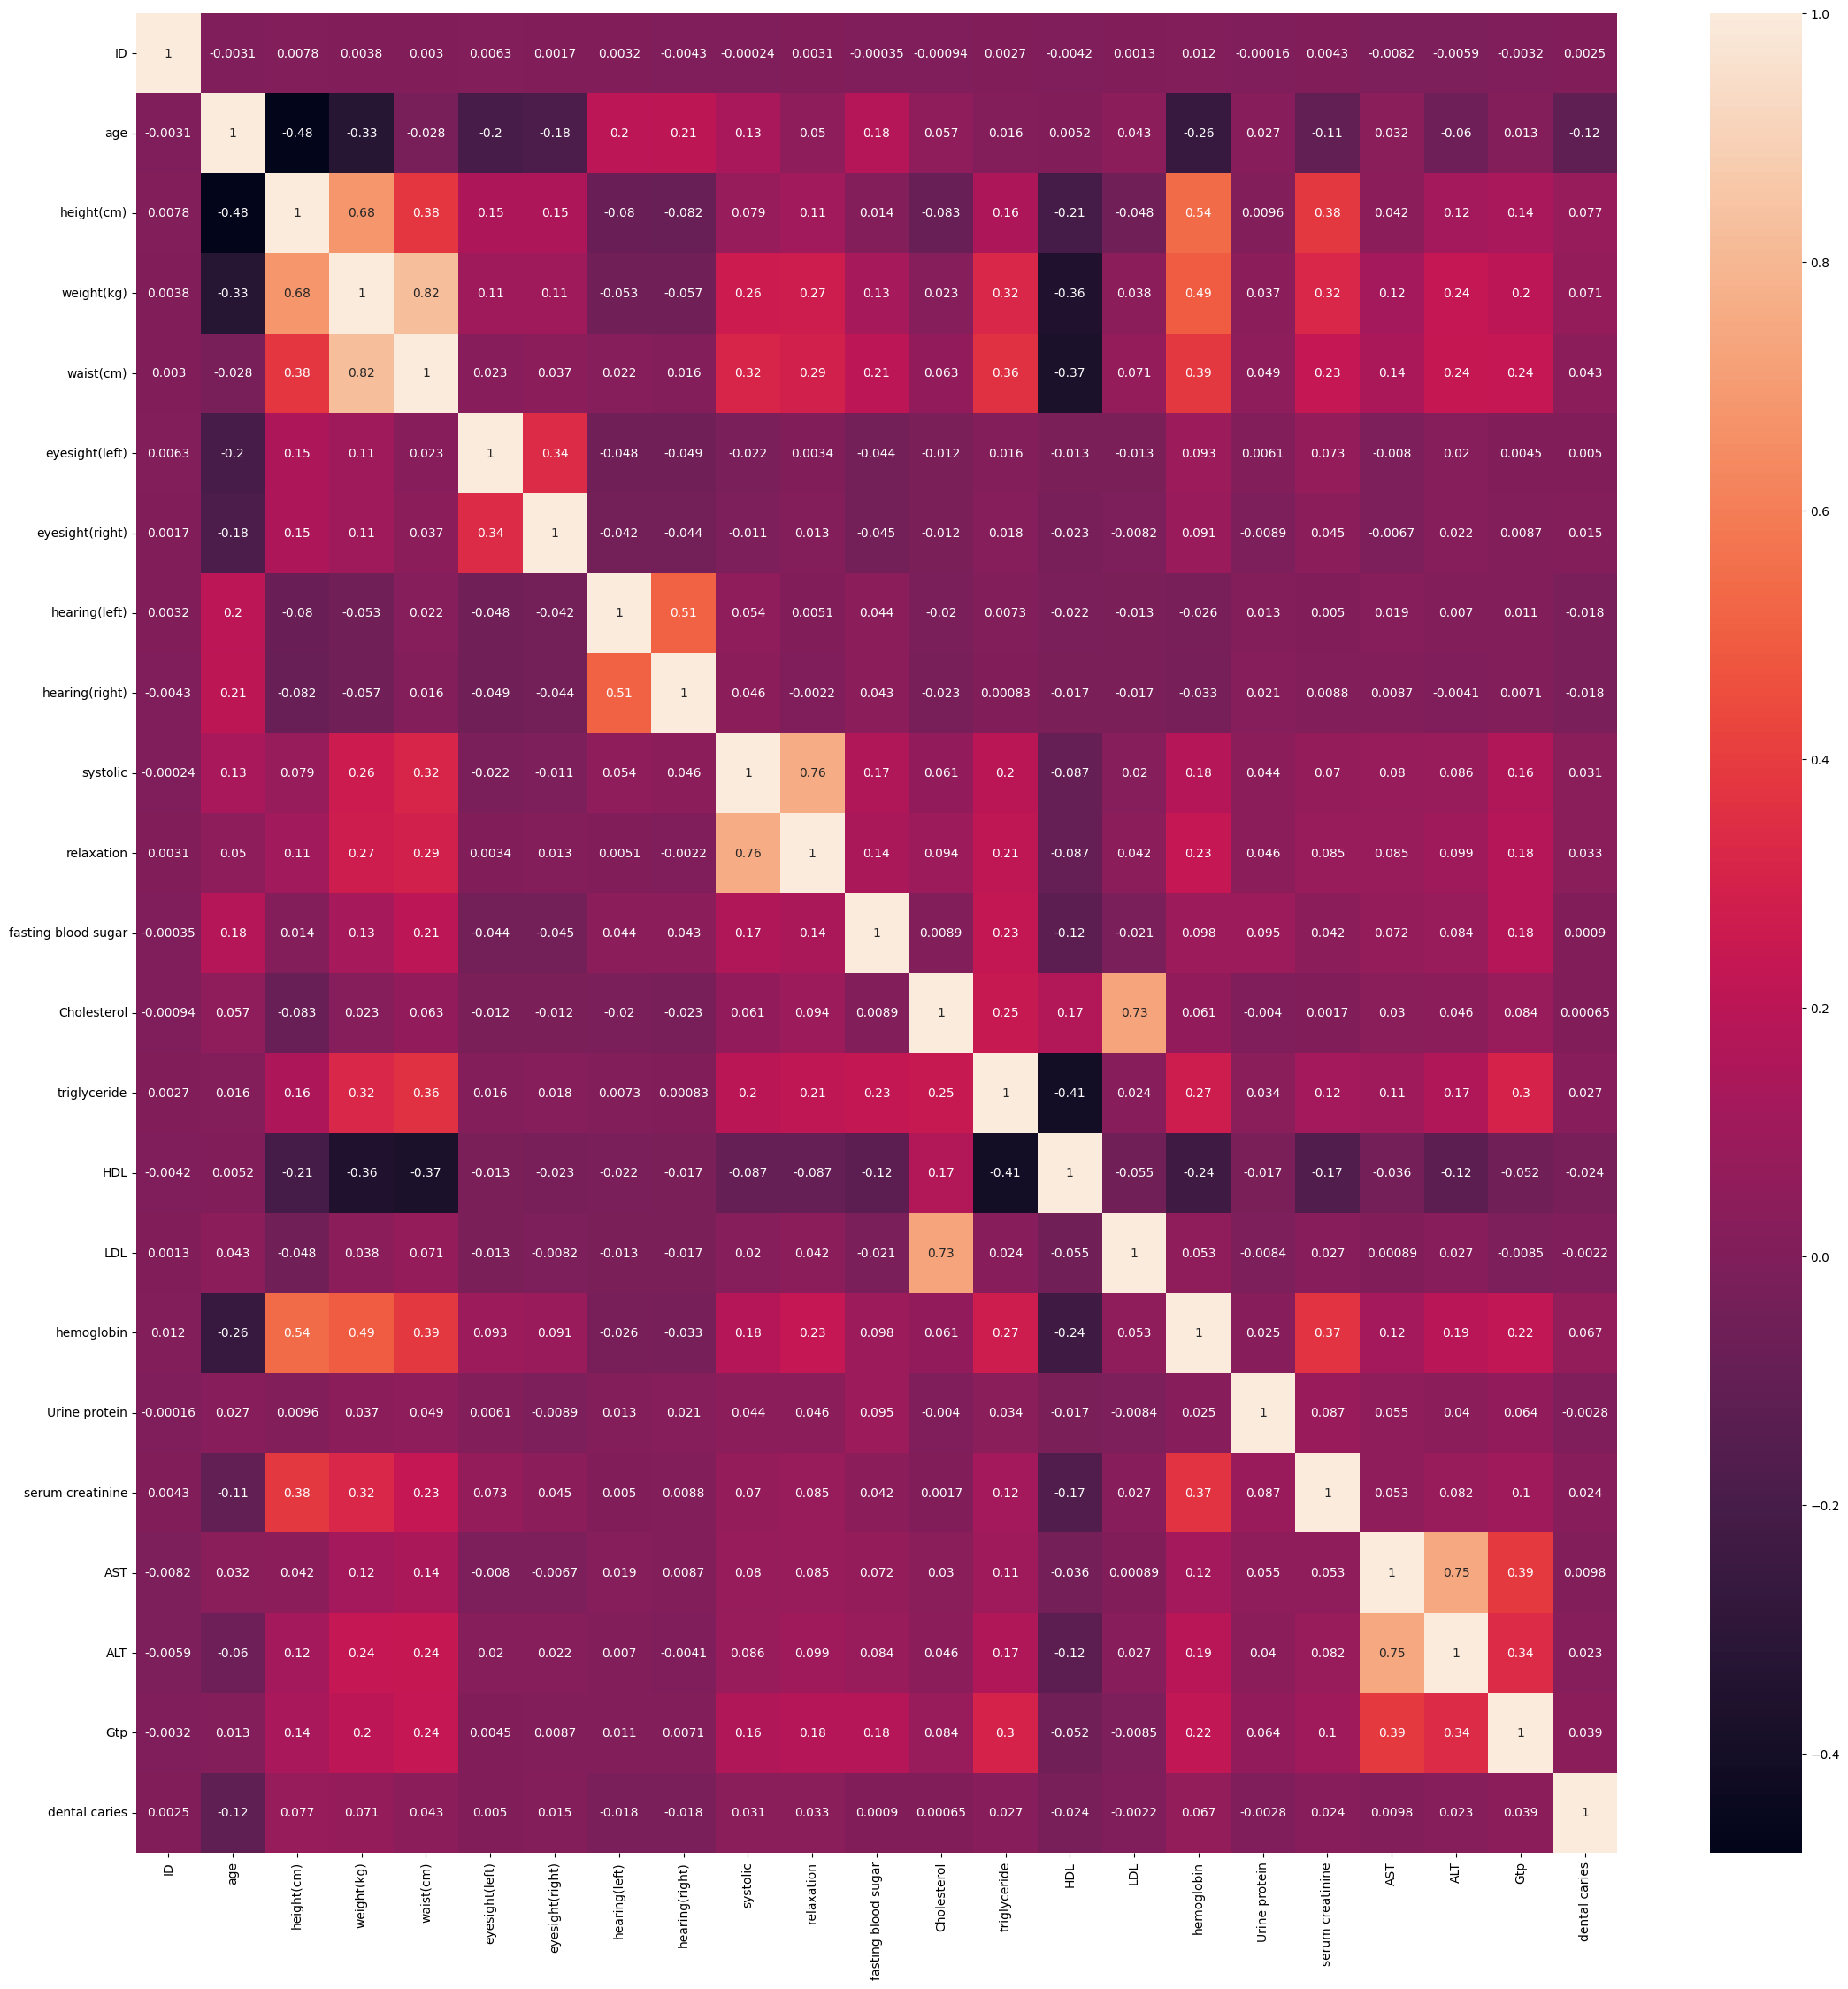

In [193]:
plt.figure(figsize=(27, 27))
sns.heatmap(dataframe.corr(numeric_only=True), annot=True)
None

In [194]:
def clearData(dataframe : pd.DataFrame) -> pd.DataFrame:

    
    dataframe['age'] = dataframe['age'].fillna(method= 'backfill')
    dataframe['weight(kg)'] = dataframe['weight(kg)'].fillna(method= 'backfill')

    # print(dataframe['weight(kg)'].isna().sum())
    
    dataframe['M'] = dataframe['gender'].apply(lambda x: 1 if x == 'M' else 0)
    dataframe['F'] = dataframe['gender'].apply(lambda x: 1 if x == 'F' else 0)
    dataframe.drop('gender', axis= 1 , inplace=True)
    
    dataframe['tartarY'] = dataframe['tartar'].apply(lambda x: 1 if x == 'Y' else 0)
    dataframe['tartarN'] = dataframe['tartar'].apply(lambda x: 1 if x == 'N' else 0)
    dataframe.drop('tartar', axis= 1, inplace=True)

    dataframe = dataframe.drop(['oral','ID'], axis=1)

    # Log transformation for fasting blood sugar, gtp, alt, ast, serum creatinine
    dataframe['fasting blood sugar'] = np.log(dataframe['fasting blood sugar'])
    dataframe['Gtp'] = np.log(dataframe['Gtp'])
    dataframe['ALT'] = np.log(dataframe['ALT'])
    dataframe['AST'] = np.log(dataframe['AST'])
    dataframe['serum creatinine'] = np.log(dataframe['serum creatinine'])

    # Create new features
    dataframe['WH'] = dataframe['waist(cm)'] * dataframe['weight(kg)']
    
    # BMI = weight / height^2
    dataframe['BMI'] = dataframe['weight(kg)'] / (dataframe['height(cm)'] ** 2)
    dataframe = dataframe.drop(['waist(cm)', 'weight(kg)', 'height(cm)'], axis=1)

    dataframe['ALT+AST'] = dataframe['ALT'] * dataframe['AST']
    dataframe = dataframe.drop(['ALT', 'AST'], axis=1)


    dataframe['LDL+Cholesterol'] = dataframe['LDL'] * dataframe['Cholesterol']
    dataframe = dataframe.drop(['LDL', 'Cholesterol'], axis=1)


    dataframe['rel+systolic'] = dataframe['relaxation'] * dataframe['systolic']
    dataframe = dataframe.drop(['relaxation', 'systolic'], axis=1)


    return dataframe

In [195]:
dataframe['smoking'] = dataframe['smoking'].apply(lambda x: 1 if x == 'yes' else -1)

In [196]:
dataframe = clearData(dataframe)

In [197]:
dataframe.isna().sum()

age                    0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
fasting blood sugar    0
triglyceride           0
HDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
Gtp                    0
dental caries          0
smoking                0
M                      0
F                      0
tartarY                0
tartarN                0
WH                     0
BMI                    0
ALT+AST                0
LDL+Cholesterol        0
rel+systolic           0
dtype: int64

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [199]:
model = LogisticRegression()
features = PolynomialFeatures(degree= 3)


In [200]:
X = dataframe.drop('smoking', axis=1)
y = dataframe['smoking']

std = StandardScaler()

X_std = std.fit_transform(X)

X_poly = features.fit_transform(X_std)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

/home/artem216/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [202]:
y_pred = model.predict(X_test)

In [203]:
from sklearn import metrics

print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))

accuracy: 0.7607451464482101
F1 0.6748017083587553


In [204]:
model.fit(X_poly, y)
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))

accuracy: 0.7607451464482101
F1 0.6748017083587553


/home/artem216/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
score = model.score(X_poly, y)
print(score)

0.7733087938232257


Text(0.5, 1.0, 'Accuracy Score: 0.7733087938232257')

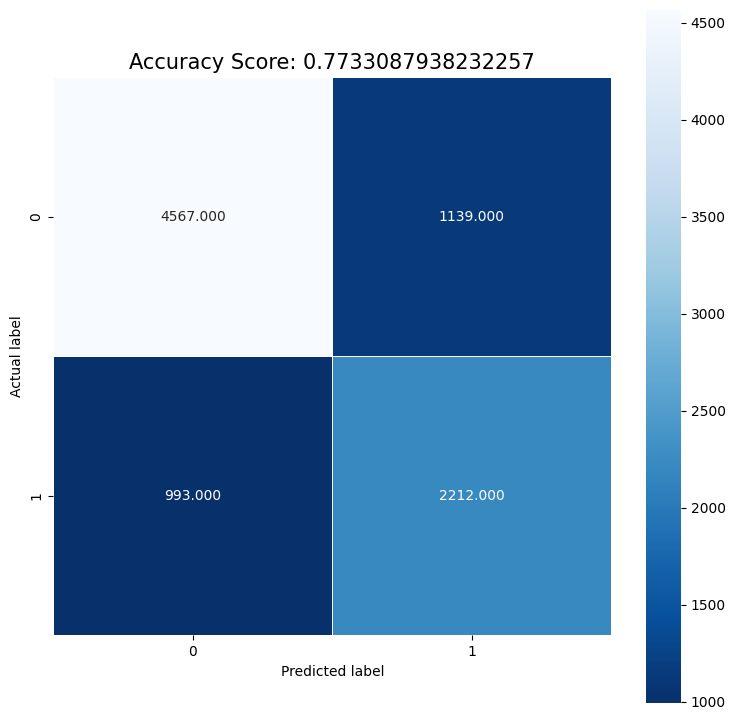

In [206]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

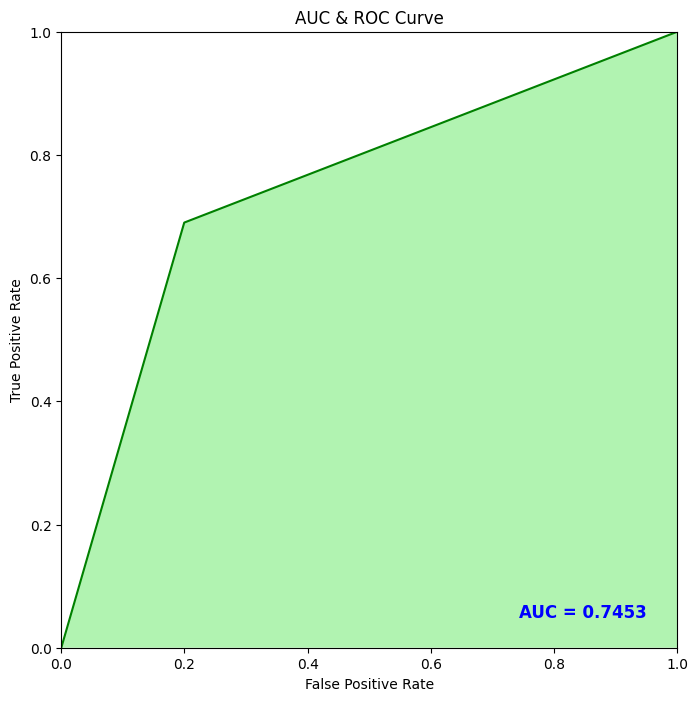

In [207]:
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [208]:
testdf = pd.read_csv('./data/smoking_test.csv')

In [209]:
testid = testdf['ID']

In [210]:
testdf = clearData(testdf)

In [211]:
testdf_std = std.transform(testdf)
test_poly = features.transform(testdf_std)

In [212]:
y_ans = model.predict(test_poly)

In [213]:
y_ans

array([-1,  1, -1, ..., -1,  1, -1])

In [214]:
y_ans = pd.DataFrame(y_ans, columns=['smoking'])
y_ans['smoking'] = y_ans['smoking'].replace({1: 'yes', -1: 'no'})
ans = pd.concat([testid, y_ans], axis=1)
ans.shape

(11138, 2)

In [215]:
ans.to_csv('./data/smoking_ans.csv', index=False)